## Looking at the ResStock test run from 2020-02-28

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#%matplotlib ipympl

In [2]:
indir = r"/mnt/g/Shared drives/BTO Topic 2  Integrating EE & DR/Task 2/Load_Shape_Data/ResStock/Test Run 20200228"


In [6]:
summ = pd.read_csv(os.path.join(indir, 'results_up00.csv'))

In [7]:
summ.head()

building_id           started_at         completed_at completed_status  \
0          218  2020-02-26 19:06:43  2020-02-26 19:07:36          Success   
1          199  2020-02-26 19:19:40  2020-02-26 19:20:35          Success   
2          433  2020-02-26 18:58:11  2020-02-26 18:59:01          Success   
3          698  2020-02-26 19:26:20  2020-02-26 19:27:14          Success   
4          739  2020-02-26 18:58:11  2020-02-26 19:09:29          Success   

   apply_upgrade.applicable  apply_upgrade.upgrade_name  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   

   apply_upgrade.reference_scenario build_existing_model.applicable  \
0                               NaN                            True   
1                               NaN                            True   
2                               NaN                            True   
3                               NaN                            True   
4                               NaN                            True   

  build_existing_model.bathroom_spot_vent_hour  build_existing_model.bedrooms  \
0                                       Hour13                            3.0   
1                                        Hour1                            4.0   
2                                       Hour22                            3.0   
3                                       Hour21                            3.0   
4                                       Hour15                            1.0   

   ... simulation_output_report.total_site_fuel_oil_mbtu  \
0  ...                                          0.000000   
1  ...                                        173.279492   
2  ...                                          0.000000   
3  ...                                          0.000000   
4  ...                                          0.000000   

  simulation_output_report.total_site_natural_gas_therm  \
0                                         804.698206      
1                                           0.000000      
2                                         275.643815      
3                                         550.601141      
4                                        8411.393947      

  simulation_output_report.total_site_propane_mbtu  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

  simulation_output_report.total_site_wood_mbtu  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

  simulation_output_report.upgrade_cost_usd  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

  simulation_output_report.wall_area_above_grade_conditioned_ft_2  \
0                                             746.67                
1                                            2586.53                
2                                            1055.95                
3                                            1597.24                
4                                            6720.00                

  simulation_output_report.wall_area_above_grade_exterior_ft_2  \
0                                             816.11             
1                                            2794.86             
2                          

In [93]:
len(summ)

1010

In [20]:
summ.columns.values

array(['building_id', 'started_at', 'completed_at', 'completed_status',
       'apply_upgrade.applicable', 'apply_upgrade.upgrade_name',
       'apply_upgrade.reference_scenario',
       'build_existing_model.applicable',
       'build_existing_model.bathroom_spot_vent_hour',
       'build_existing_model.bedrooms',
       'build_existing_model.ceiling_fan',
       'build_existing_model.climate_zone_ba',
       'build_existing_model.climate_zone_iecc',
       'build_existing_model.clothes_dryer',
       'build_existing_model.clothes_washer',
       'build_existing_model.clothes_washer_presence',
       'build_existing_model.cooking_range',
       'build_existing_model.cooking_range_schedule',
       'build_existing_model.cooling_setpoint',
       'build_existing_model.cooling_setpoint_apply_offset',
       'build_existing_model.cooling_setpoint_has_offset',
       'build_existing_model.cooling_setpoint_offset_magnitude',
       'build_existing_model.cooling_setpoint_offset_period',
    

In [28]:
summ[['build_existing_model.hvac_system_cooling',
       'build_existing_model.hvac_system_cooling_type',]]

build_existing_model.hvac_system_cooling  \
0     FIXME Room AC, EER 10.7, 20% Conditioned   
1     FIXME Room AC, EER 10.7, 20% Conditioned   
2                                         None   
3     FIXME Room AC, EER 10.7, 20% Conditioned   
4                                  AC, SEER 10   
...                                        ...   
1005                               AC, SEER 10   
1006                                      None   
1007                                      None   
1008                               AC, SEER 15   
1009                               AC, SEER 10   

     build_existing_model.hvac_system_cooling_type  
0                                             Room  
1                                             Room  
2                                             None  
3                                             Room  
4                                          Central  
...                                            ...  
1005                                       Central  
1006                                          None  
1007                                       Central  
1008                                       Central  
1009                                       Central  

[1010 rows x 2 columns]

In [34]:
brief_summ = summ.groupby([
    'build_existing_model.location_weather_filename',
    'build_existing_model.geometry_building_type_recs',
    'build_existing_model.geometry_house_size',
    ]).agg({'building_id':'count', 
            'build_existing_model.hvac_system_cooling_type':lambda x: (x!='None').sum(),
            'simulation_output_report.floor_area_conditioned_ft_2':'sum',
            'build_existing_model.bedrooms':'mean'}
          ).reset_index().rename(
            columns={'build_existing_model.location_weather_filename':'weather_station',
                     'build_existing_model.geometry_building_type_recs':'building_type',
                     'build_existing_model.geometry_house_size':'size',
                     'building_id': 'num_buildings',
                     'build_existing_model.hvac_system_cooling_type': 'num_with_ac',
                     'simulation_output_report.floor_area_conditioned_ft_2':'tot_cond_ft_2',
                     'build_existing_model.bedrooms':'mean_num_bedrooms'})
brief_summ.to_csv(os.path.join(indir,'brief_summary.csv'), index=False)
brief_summ

weather_station  \
0                 USA_CA_Arcata.725945_2016.epw   
1                 USA_CA_Arcata.725945_2016.epw   
2                 USA_CA_Arcata.725945_2016.epw   
3    USA_CA_Bakersfield.Meadows.723840_2016.epw   
4    USA_CA_Bakersfield.Meadows.723840_2016.epw   
..                                          ...   
223  USA_TX_Wichita.Falls.Sheps.723510_2016.epw   
224      USA_VT_Burlington.Intl.726170_2016.epw   
225      USA_VT_Burlington.Intl.726170_2016.epw   
226      USA_VT_Burlington.Intl.726170_2016.epw   
227      USA_VT_Burlington.Intl.726170_2016.epw   

                     building_type       size  num_buildings  num_with_ac  \
0                      Mobile Home     0-1499              1            0   
1           Single-Family Detached     0-1499              1            0   
2           Single-Family Detached  1500-2499              3            3   
3                      Mobile Home     0-1499              1            0   
4    Multi-Family with 2 - 4 Units     0-1499              1            1   
..                             ...        ...            ...          ...   
223         Single-Family Detached  1500-2499              3            3   
224                    Mobile Home     0-1499              1            1   
225  Multi-Family with 2 - 4 Units     0-1499              2            1   
226         Single-Family Detached     0-1499              2            1   
227         Single-Family Detached  1500-2499              4            3   

     tot_cond_ft_2  mean_num_bedrooms  
0           1000.0           3.000000  
1           1000.0           4.000000  
2           6000.0           3.000000  
3           1000.0           3.000000  
4           2000.0           2.000000  
..             ...                ...  
223         6000.0           3.666667  
224         1000.0           2.000000  
225         3000.0           1.500000  
226         2000.0           2.500000  
227         8000.0           3.500000  

[228 rows x 7 columns]

In [35]:
data1 = pd.read_csv(os.path.join(indir, "Test12_perbldgresults.csv"), nrows=8784, header=0)
data2 = pd.read_csv(os.path.join(indir, "Test12_perbldgresults.csv"), nrows=8784, 
                    skiprows=range(1,8785), header=0)

In [36]:
data1.columns
eu_cols = np.array(['Heating', 'Central_System_Heating', 'Cooling',
       'Central_System_Cooling', 'Water_Heating', 'Interior_Lights',
       'Exterior_Lights', #'Interior_Equipment', 
       'Heating_Fans', 'Cooling_Fans',
       'Heating_Fans.1', 'Cooling_Pumps', 'Central_System_Heating_Pumps',
       'Central_System_Cooling_Pumps', 'Clothes_Washer',
       'Clothes_Dryer_Electric', 'Dishwasher', 'Refrigerator', 'Cooking_Range',
       'Extra_Refrigerator', 'Freezer', 'Plug_Loads', 'House_Fan', 'Range_Fan',
       'Bath_Fan', 'Ceiling_Fan', 'Hot_Tub_Heater_Electric', 'Hot_Tub_Pump',
       'Pool_Heater_Electric', 'Pool_Pump', 'Well_Pump', 'Garage_Lighting',
       'Holiday_Lights'])

In [37]:
data1.tail()

epw    unit_type  upgrade  \
8779  USA_CA_Arcata.725945_2016.epw  Mobile Home        0   
8780  USA_CA_Arcata.725945_2016.epw  Mobile Home        0   
8781  USA_CA_Arcata.725945_2016.epw  Mobile Home        0   
8782  USA_CA_Arcata.725945_2016.epw  Mobile Home        0   
8783  USA_CA_Arcata.725945_2016.epw  Mobile Home        0   

                         time  Building_Electricity  Heating  \
8779  2016-12-31 20:00:00.000              0.702120      0.0   
8780  2016-12-31 21:00:00.000              0.640337      0.0   
8781  2016-12-31 22:00:00.000              0.556449      0.0   
8782  2016-12-31 23:00:00.000              0.485657      0.0   
8783  2017-01-01 00:00:00.000              0.348915      0.0   

      Central_System_Heating  Cooling  Central_System_Cooling  Water_Heating  \
8779                     0.0      0.0                     0.0            0.0   
8780                     0.0      0.0                     0.0            0.0   
8781                     0.0      0.0                     0.0            0.0   
8782                     0.0      0.0                     0.0            0.0   
8783                     0.0      0.0                     0.0            0.0   

      ...  Range_Fan  Bath_Fan  Ceiling_Fan  Hot_Tub_Heater_Electric  \
8779  ...        0.0       0.0     0.026838                      0.0   
8780  ...        0.0       0.0     0.028440                      0.0   
8781  ...        0.0       0.0     0.027639                      0.0   
8782  ...        0.0       0.0     0.023633                      0.0   
8783  ...        0.0       0.0     0.020028                      0.0   

      Hot_Tub_Pump  Pool_Heater_Electric  Pool_Pump  Well_Pump  \
8779           0.0                   0.0   0.002993        0.0   
8780           0.0                   0.0   0.001497        0.0   
8781           0.0                   0.0   0.001123        0.0   
8782           0.0                   0.0   0.001123        0.0   
8783           0.0                   0.0   0.001123        0.0   

      Garage_Lighting  Holiday_Lights  
8779              0.0             0.0  
8780              0.0             0.0  
8781              0.0             0.0  
8782              0.0             0.0  
8783              0.0             0.0  

[5 rows x 38 columns]

In [39]:
#Check building energy consumption
print(data1['Building_Electricity'].sum())
(data1[eu_cols].sum().sum())

4456.387704420246


4456.387704420236

In [10]:
data2.head()

epw    unit_type  upgrade  \
0  USA_CA_Arcata.725945_2016.epw  Mobile Home        1   
1  USA_CA_Arcata.725945_2016.epw  Mobile Home        1   
2  USA_CA_Arcata.725945_2016.epw  Mobile Home        1   
3  USA_CA_Arcata.725945_2016.epw  Mobile Home        1   
4  USA_CA_Arcata.725945_2016.epw  Mobile Home        1   

                      time  Building_Electricity  Heating  \
0  2016-01-01 01:00:00.000              0.138565      0.0   
1  2016-01-01 02:00:00.000              0.123922      0.0   
2  2016-01-01 03:00:00.000              0.118656      0.0   
3  2016-01-01 04:00:00.000              0.141083      0.0   
4  2016-01-01 05:00:00.000              0.116892      0.0   

   Central_System_Heating  Cooling  Central_System_Cooling  Water_Heating  \
0                     0.0      0.0                     0.0            0.0   
1                     0.0      0.0                     0.0            0.0   
2                     0.0      0.0                     0.0            0.0   
3                     0.0      0.0                     0.0            0.0   
4                     0.0      0.0                     0.0            0.0   

   ...  Range_Fan  Bath_Fan  Ceiling_Fan  Hot_Tub_Heater_Electric  \
0  ...   0.000000       0.0     0.016023                      0.0   
1  ...   0.000000       0.0     0.014821                      0.0   
2  ...   0.000000       0.0     0.014821                      0.0   
3  ...   0.025003       0.0     0.014420                      0.0   
4  ...   0.005001       0.0     0.013219                      0.0   

   Hot_Tub_Pump  Pool_Heater_Electric  Pool_Pump  Well_Pump  Garage_Lighting  \
0           0.0                   0.0   0.001055        0.0              0.0   
1           0.0                   0.0   0.001055        0.0              0.0   
2           0.0                   0.0   0.001055        0.0              0.0   
3           0.0                   0.0   0.001407        0.0              0.0   
4           0.0                   0.0   0.002814        0.0              0.0   

   Holiday_Lights  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 38 columns]

In [11]:
data2.tail()

epw    unit_type  upgrade  \
8779  USA_CA_Arcata.725945_2016.epw  Mobile Home        1   
8780  USA_CA_Arcata.725945_2016.epw  Mobile Home        1   
8781  USA_CA_Arcata.725945_2016.epw  Mobile Home        1   
8782  USA_CA_Arcata.725945_2016.epw  Mobile Home        1   
8783  USA_CA_Arcata.725945_2016.epw  Mobile Home        1   

                         time  Building_Electricity  Heating  \
8779  2016-12-31 20:00:00.000              0.342474      0.0   
8780  2016-12-31 21:00:00.000              0.315284      0.0   
8781  2016-12-31 22:00:00.000              0.278111      0.0   
8782  2016-12-31 23:00:00.000              0.242270      0.0   
8783  2017-01-01 00:00:00.000              0.179993      0.0   

      Central_System_Heating  Cooling  Central_System_Cooling  Water_Heating  \
8779                     0.0      0.0                     0.0            0.0   
8780                     0.0      0.0                     0.0            0.0   
8781                     0.0      0.0                     0.0            0.0   
8782                     0.0      0.0                     0.0            0.0   
8783                     0.0      0.0                     0.0            0.0   

      ...  Range_Fan  Bath_Fan  Ceiling_Fan  Hot_Tub_Heater_Electric  \
8779  ...        0.0       0.0     0.026838                      0.0   
8780  ...        0.0       0.0     0.028440                      0.0   
8781  ...        0.0       0.0     0.027639                      0.0   
8782  ...        0.0       0.0     0.023633                      0.0   
8783  ...        0.0       0.0     0.020028                      0.0   

      Hot_Tub_Pump  Pool_Heater_Electric  Pool_Pump  Well_Pump  \
8779           0.0                   0.0   0.002814        0.0   
8780           0.0                   0.0   0.001407        0.0   
8781           0.0                   0.0   0.001055        0.0   
8782           0.0                   0.0   0.001055        0.0   
8783           0.0                   0.0   0.001055        0.0   

      Garage_Lighting  Holiday_Lights  
8779              0.0             0.0  
8780              0.0             0.0  
8781              0.0             0.0  
8782              0.0             0.0  
8783              0.0             0.0  

[5 rows x 38 columns]

In [12]:
bldg_eu_cols = eu_cols[data1[eu_cols].sum()>0]
bldg_eu_cols

array(['Interior_Lights', 'Exterior_Lights', 'Clothes_Washer',
       'Clothes_Dryer_Electric', 'Dishwasher', 'Refrigerator',
       'Cooking_Range', 'Plug_Loads', 'Range_Fan', 'Bath_Fan',
       'Ceiling_Fan', 'Pool_Pump'], dtype='<U28')

In [52]:
fig,ax=plt.subplots(figsize=[15,5])
startday = 200
ndays=7
start=24*startday
end=start+24*ndays
data1.loc[start:end, 'Building_Electricity'].plot(ax=ax)
data2.loc[start:end, 'Building_Electricity'].plot(ax=ax)

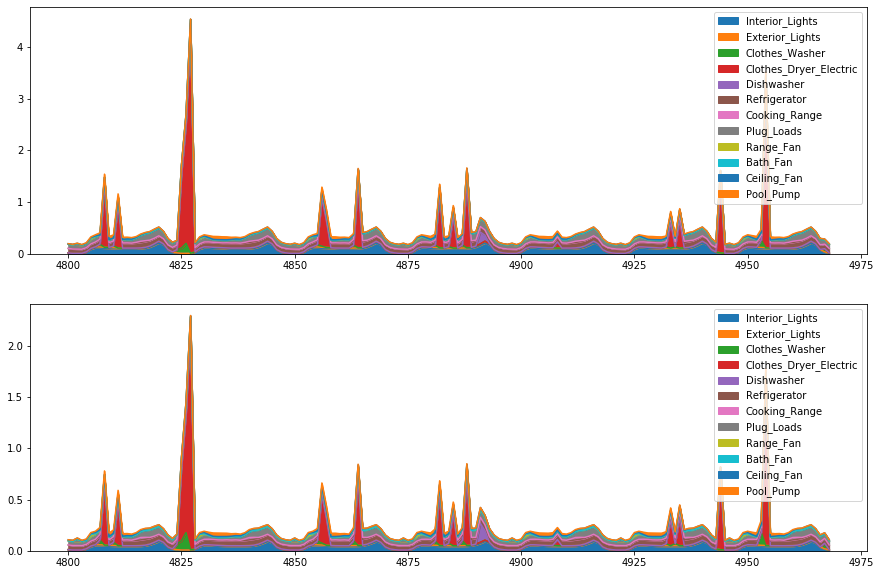

In [14]:
fig,ax=plt.subplots(2,1,figsize=[15,10])
data1.loc[start:end, bldg_eu_cols].plot.area(ax=ax[0])
data2.loc[start:end, bldg_eu_cols].plot.area(ax=ax[1])

In [15]:
data1.columns

Index(['epw', 'unit_type', 'upgrade', 'time', 'Building_Electricity',
       'Heating', 'Central_System_Heating', 'Cooling',
       'Central_System_Cooling', 'Water_Heating', 'Interior_Lights',
       'Exterior_Lights', 'Interior_Equipment', 'Heating_Fans', 'Cooling_Fans',
       'Heating_Fans.1', 'Cooling_Pumps', 'Central_System_Heating_Pumps',
       'Central_System_Cooling_Pumps', 'Clothes_Washer',
       'Clothes_Dryer_Electric', 'Dishwasher', 'Refrigerator', 'Cooking_Range',
       'Extra_Refrigerator', 'Freezer', 'Plug_Loads', 'House_Fan', 'Range_Fan',
       'Bath_Fan', 'Ceiling_Fan', 'Hot_Tub_Heater_Electric', 'Hot_Tub_Pump',
       'Pool_Heater_Electric', 'Pool_Pump', 'Well_Pump', 'Garage_Lighting',
       'Holiday_Lights'],
      dtype='object')

In [16]:
'-'.join([data1.loc[0,'epw'].split('.')[0], data1.loc[0,'unit_type'].replace(' ','_')])

'USA_CA_Arcata-Mobile_Home'

In [63]:
counter = {}
columns=data1.columns
i=-1
#for j in range(100):
while True:
    i+=1
    data = pd.read_csv(os.path.join(indir, "Test12_perbldgresults.csv"), nrows=8784, 
                       skiprows=range(1,8784*i+1), header=0)

    #Stop when we run out of data.
    assert len(data)==8784, "Oops out of data: "+str(len(data))
    
    #Make sure we're striding through the years correctly.
    assert data.loc[0,'time'] == data1.loc[0,'time']

    #Generate name to check uniqueness by building, weather station, and upgrade
    name='-'.join(['.'.join(data.loc[0,'epw'].split('.')[:-1]),  
                   'upgrade_'+str(data.loc[0,'upgrade']),
                   data.loc[0,'unit_type'].replace(' ','_'),])
    #Get a counter to append to building type if there is more than one
    if name in counter.keys():
        counter[name]+=1
    else:
        counter[name]=0
    #Re-order for readability
    name='-'.join(['.'.join(data.loc[0,'epw'].split('.')[:-1]),
                   '_'.join([data.loc[0,'unit_type'].replace(' ','_'), 
                             str(counter[name])]),  
                   'upgrade_'+str(data.loc[0,'upgrade'])])
    #name = '_'.join([name,str(counter[name])])
    print(str(i)+': '+name)
    data.to_csv(os.path.join(indir,'building_load_shapes', name+'.csv'))


0: USA_CA_Arcata.725945_2016-Mobile_Home_0-upgrade_0
1: USA_CA_Arcata.725945_2016-Mobile_Home_0-upgrade_1
2: USA_CA_Arcata.725945_2016-Mobile_Home_0-upgrade_2
3: USA_CA_Arcata.725945_2016-Mobile_Home_0-upgrade_3
4: USA_CA_Arcata.725945_2016-Mobile_Home_0-upgrade_4
5: USA_CA_Arcata.725945_2016-Mobile_Home_0-upgrade_5
6: USA_CA_Arcata.725945_2016-Single-Family_Detached_0-upgrade_0
7: USA_CA_Arcata.725945_2016-Single-Family_Detached_0-upgrade_1
8: USA_CA_Arcata.725945_2016-Single-Family_Detached_0-upgrade_2
9: USA_CA_Arcata.725945_2016-Single-Family_Detached_0-upgrade_3
10: USA_CA_Arcata.725945_2016-Single-Family_Detached_0-upgrade_4
11: USA_CA_Arcata.725945_2016-Single-Family_Detached_0-upgrade_5
12: USA_CA_Bakersfield.Meadows.723840_2016-Mobile_Home_0-upgrade_0
13: USA_CA_Bakersfield.Meadows.723840_2016-Mobile_Home_0-upgrade_1
14: USA_CA_Bakersfield.Meadows.723840_2016-Mobile_Home_0-upgrade_2
15: USA_CA_Bakersfield.Meadows.723840_2016-Mobile_Home_0-upgrade_3
16: USA_CA_Bakersfield.Meado

KeyError: 0

In [109]:
data3 = pd.read_csv(os.path.join(indir, 'building_load_shapes', 'USA_TX_Wichita.Falls.Sheps.723510_2016-Single-Family_Detached_0-upgrade_0.csv'))
data4 = pd.read_csv(os.path.join(indir, 'building_load_shapes', 'USA_TX_Wichita.Falls.Sheps.723510_2016-Single-Family_Detached_0-upgrade_3.csv'))

In [110]:
bldg_eu_cols = eu_cols[data4[eu_cols].sum()>0]
bldg_eu_cols

array(['Heating', 'Cooling', 'Water_Heating', 'Interior_Lights',
       'Exterior_Lights', 'Heating_Fans', 'Cooling_Fans',
       'Clothes_Washer', 'Clothes_Dryer_Electric', 'Dishwasher',
       'Refrigerator', 'Cooking_Range', 'Extra_Refrigerator', 'Freezer',
       'Plug_Loads', 'House_Fan', 'Range_Fan', 'Bath_Fan', 'Ceiling_Fan',
       'Pool_Pump', 'Well_Pump', 'Garage_Lighting'], dtype='<U28')

In [111]:
bldg_eu_cols[[c not in eu_cols[data3[eu_cols].sum()>0] for c in bldg_eu_cols]]

array(['House_Fan'], dtype='<U28')

In [112]:
startday = 150
ndays=7
start=24*startday
end=start+24*ndays
fig,ax=plt.subplots(2,1,figsize=[15,12])
data3.loc[start:end, bldg_eu_cols].plot.area(ax=ax[0], legend=False)
data4.loc[start:end, bldg_eu_cols].plot.area(ax=ax[1], legend=False)
ax[1].set_ylim(ax[0].get_ylim())
fig.legend(loc='lower center', ncol=5, bbox_to_anchor=[0.4, -0.01])
#plt.tight_layout()

In [116]:
fig,ax=plt.subplots(figsize=[15,5])
data3.loc[start:end, 'Cooling'].plot(ax=ax, label='base')
data4.loc[start:end, 'Cooling'].plot(ax=ax, label='EE')
ax.legend()
#ax[1].set_ylim(ax[0].get_ylim())
#fig.legend(loc='lower center', ncol=5, bbox_to_anchor=[0.4, -0.01])

In [108]:
data3[bldg_eu_cols].sum() - data4[bldg_eu_cols].sum()

Heating                  -280.405202
Cooling                   220.483119
Water_Heating               0.512046
Interior_Lights             0.000000
Exterior_Lights             0.000000
Heating_Fans               -3.647353
Cooling_Fans               61.161235
Clothes_Washer              0.000000
Clothes_Dryer_Electric      0.000000
Dishwasher                  0.000000
Refrigerator                0.000000
Cooking_Range               0.000000
Extra_Refrigerator          0.000000
Freezer                     0.000000
Plug_Loads                  0.000000
Range_Fan                   0.000000
Bath_Fan                    0.000000
Ceiling_Fan                 0.000000
Pool_Pump                   0.000000
Well_Pump                   0.000000
Garage_Lighting             0.000000
dtype: float64